# Deep Objects And Conciousness Detection .

# Cloning Useful Repos

In [2]:
# Ultralytics YOLOv5 🚀 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility.
# for image labelling we'll use the github repo:

!git clone https://github.com/ultralytics/yolov5

!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'yolov5' already exists and is not an empty directory.


# Installing Requirements And Other Model Dependencies .

In [4]:
!cd yolov5 & pip install -r requirements.txt
!pip install pyqt5 lxml --upgrade
!cd labelImg & pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 0.0/40.6 kB ? eta -:--:--
     ---------------------------------------- 40.6/40.6 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 7.3 MB/s eta 0:00:06
    --------------------------------------- 0.8/38.6 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.6 MB 11.8 MB/s eta 0:00:04
   - -------------------------------------- 1.5/38.6 MB 11.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/38.6 MB 12.3 MB/s eta 0:00:03
   --- ------------------------------------ 3.2/38.6 MB 12.9 MB/s eta 0:00:03
   --- ------------------------------------ 3.5/38.6 MB 10.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.6 MB 10.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.8/38.6 MB 9.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.6 MB 8.9 MB/s eta 0:00:04
  

# Useful Imports for the Project

In [1]:
import sys
import numpy as np
import cv2 as cv
from PyQt5.QtWidgets import QApplication, QLabel, QMainWindow, QVBoxLayout, QWidget, QPushButton
from PyQt5.QtCore import QTimer
from PyQt5.QtGui import QImage, QPixmap
import pygame
import torch
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os 
import uuid 
import time


pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Loading Up The Model 

In [9]:
# pytorch.org/ultralytics_yolov5
# It is loading the pre-trained model of yolov5
# from yolov5 we are acutally using yolov5s model where s is the smallest version we are using here . (to keep things light weight)
# yolov5 is basically an object detection library also used for real time object detection .
# yolov5s is the smallest variant and suitable for real time object detection .
# ultra... is the repo name which contains yolov5s model. 

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\DC/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-4 Python-3.11.7 torch-2.2.2+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [10]:
# below is the all the different layers that are working in model .
# showing the model architecture , layers etc.
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Offline Image Detections

In [8]:
# For the detection we ahve coco classes , it refers to the categories or types of object (person , car , bicycle etc).
img = "https://ultralytics.com/images/zidane.jpg"

image 1/1: 720x1280 2 persons, 2 ties
Speed: 3274.9ms pre-process, 140.9ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


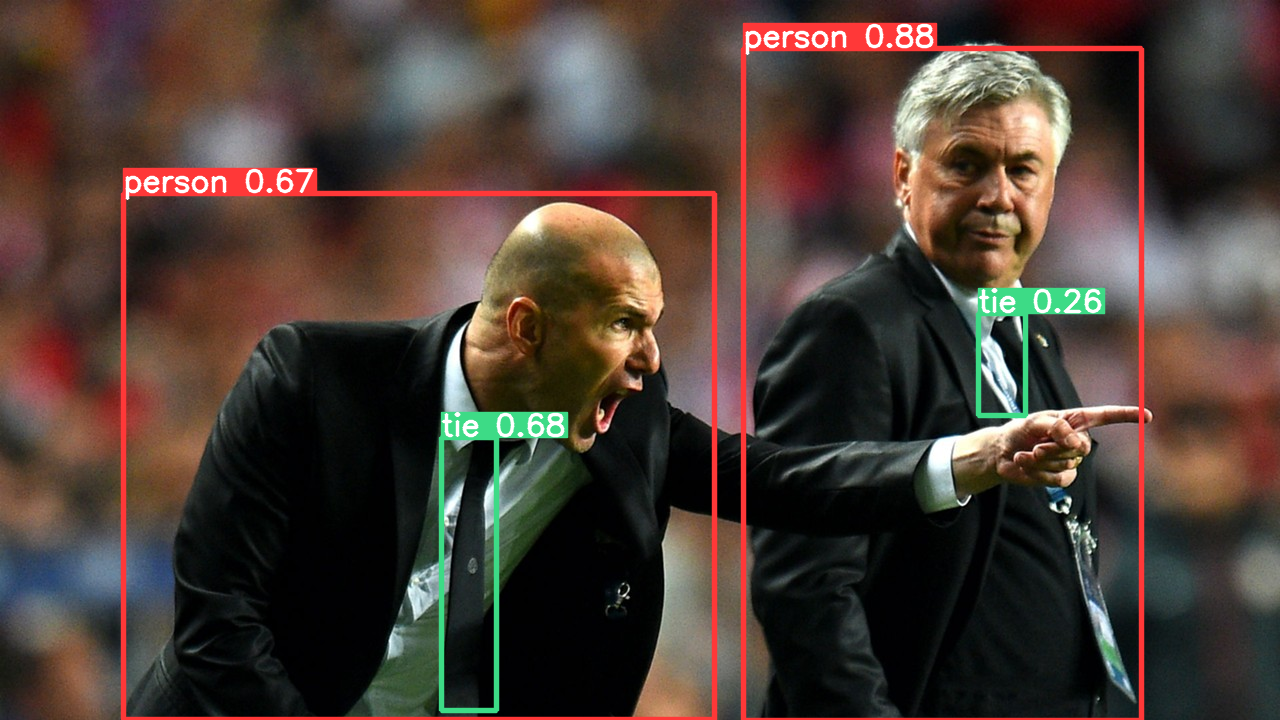

None


In [9]:
results = model(img)
results.print()
resultant_image = results.show()
print(resultant_image)

In [10]:
# The results.xyxy part tells you where these objects are located in the picture. It does this by giving you four numbers for each object: two for the top-left corner and two for the bottom-right corner of a rectangle that surrounds the object. These numbers are like coordinates on a grid, but they're relative to the size of the picture.

results.xyxy


[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [11]:
# (1, 720, 1280, 3)
# all represents the dimensions 
# 1 represents that there is only one image
# 720 is the height in pixels
# 1280 is the width in pixels
# 3 represents the color dimension (RGB)


np.array(results.render()).shape

(1, 720, 1280, 3)

# Offline Image Detection - 2

image 1/1: 684x1025 61 cars
Speed: 4330.8ms pre-process, 203.9ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


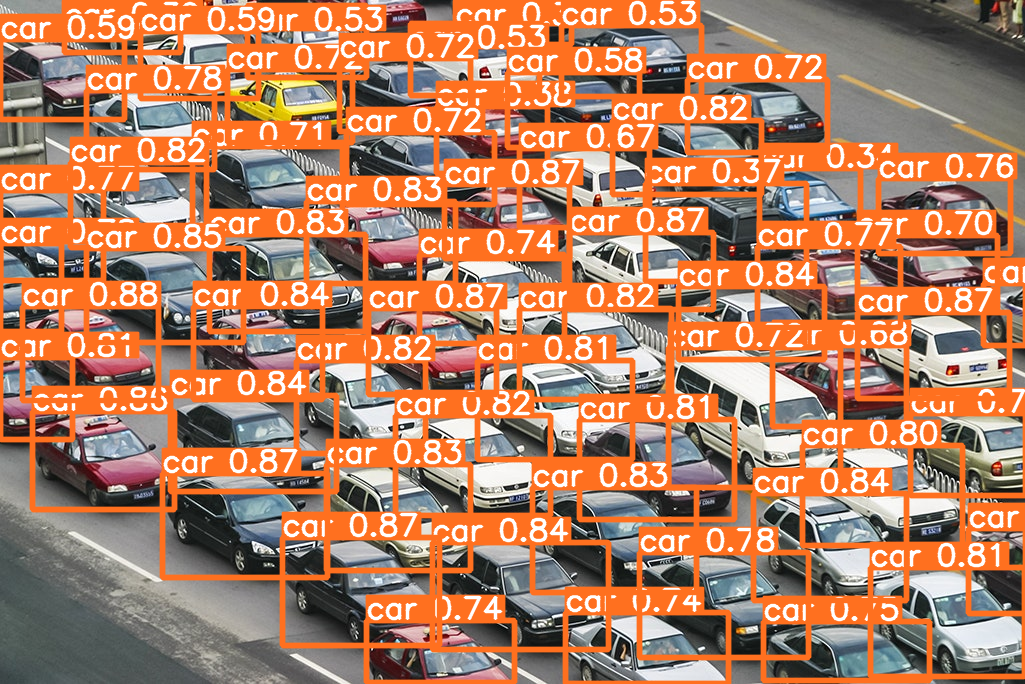

In [12]:
img = "https://media.wired.com/photos/593256b42a990b06268a9e21/master/w_1600,c_limit/traffic-jam-getty.jpg"
results = model(img)
results.print()
np.array(results.render()).shape
results.show()

In [13]:
np.array(results.render()).shape


(1, 684, 1025, 3)

# Deep Real Time Object Detections Using Cocomo Classes.

In [15]:
import cv2 as cv
import numpy as np
from PIL import Image

capture = cv.VideoCapture(0)
if not capture.isOpened():
    print("Can't open the web cam ")
    exit()
while True:
    ret, frame = capture.read()
    if not ret:
        print("Can't capture the image")
        break

    results = model(frame)

    if isinstance(results.render(), list):
        processed_frame = results.render()[0]
    else:
        processed_frame = results.render()

    # convert to numpy array 
    np_frame = np.array(processed_frame)
    # convert to PIL
    pil_image = Image.fromarray(np_frame)
    # convert to cv image
    cv_image = cv.cvtColor(np.array(pil_image),cv.COLOR_RGB2BGR)

    cv.imshow("Detection", cv_image)
    
    if cv.waitKey(10) & 0xFF == ord("q"):
        break
        
capture.release()
cv.destroyAllWindows()

# Training From Scratch

In [3]:
# we need 3 things for detection during training .
IMAGES_PATH = os.path.join("data","images") # effectively saving our images data -- data/images
labels = ['awake','drowsy']                  # we are going to work with 2 classes : when we are awake and when we are drowsy                             
number_of_images = 20

In [20]:
# first loop will gonna run 2 times (drowsy, awake)
# second loop will gonna run 20 times (num_of_images)

capture = cv.VideoCapture(0)

for label in labels:

    print('Collecting Images for {}'.format(label))

    # wait for 5 seconds for moving on to next
    time.sleep(5)

    for img_num in range(number_of_images):
        print('Collecting Images for {}, image number {}'.format(label,img_num))

        # webcam feed 
        ret, frame = capture.read()

        # naming out the image to the file
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # writes the images to the specified folder
        cv.imwrite(image_name, frame)

        # rendering to the screen 
        cv.imshow('Image Collection', frame)

        # 2s delay between captures
        time.sleep(2)
            
    if cv.waitKey(10) & 0xFF == ord("q"):
        break
        
capture.release()
cv.destroyAllWindows()
        

In [4]:
# !cd yolov5 && python train.py --img --batch 4 --epoch 10 --data dataset.yaml --weights yolov5s.pt
# !cd yolov5 && python train.py --img 640 --batch 4 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

# !cd yolov5 && python train.py --img 640 --batch 4 --epochs 10 --data dataset.yaml --weights yolov5s.pt --save-period 5
# # done
# !cd yolov5 && python train.py --img 640 --batch 4 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2 --save-period 10
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2 --save-period 10


# Custom Training Of Model For Deep Conciousness Detection

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DC/.cache\torch\hub\master.zip
YOLOv5  2024-5-4 Python-3.11.7 torch-2.2.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Custom Trained Model For Conciousness Detection With Offline Image 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DC/.cache\torch\hub\master.zip
YOLOv5  2024-5-4 Python-3.11.7 torch-2.2.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


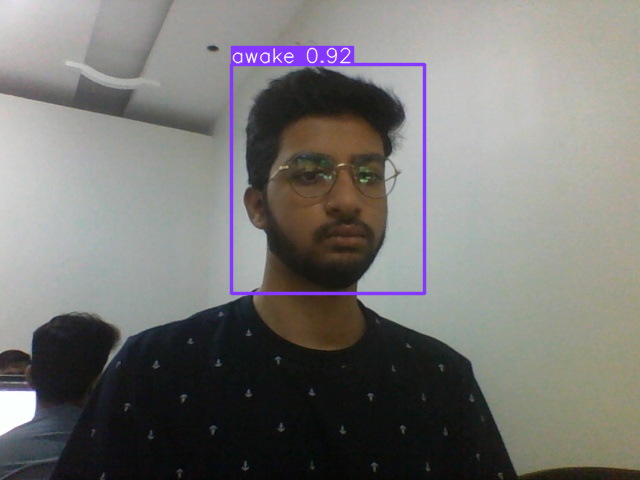

In [18]:

# Path to the image
image_path = os.path.join('data', 'images', 'awake.d45a94aa-020b-11ef-be10-308d992769f0.jpg')

# Load the image
image = Image.open(image_path)

# Perform inference
results = model(image)

# Display the results
results.show()


# Real Time Conciousness Detection With Alerts Alarm

In [3]:
class MainWindow(QMainWindow):
    def __init__(self):
        super(MainWindow, self).__init__()  # Initialize the main window.

        self.setWindowTitle("Awake and Asleep Counter")  # Set the window title.
        self.central_widget = QWidget()  # Create a central widget.
        self.setCentralWidget(self.central_widget)  # Set the central widget.

        layout = QVBoxLayout(self.central_widget)  # Create a vertical layout for the central widget.

        self.label = QLabel("Camera Feed")  # Create a label for displaying the camera feed.
        layout.addWidget(self.label)  # Add the label to the layout.

        self.start_button = QPushButton("Start")  # Create a button for starting the camera.
        layout.addWidget(self.start_button)  # Add the button to the layout.
        self.start_button.clicked.connect(self.start_camera)  # Connect the button click event to a method.

        self.capture = None  # Initialize the video capture.
        self.timer = QTimer()  # Initialize a timer for updating the frame.
        self.timer.timeout.connect(self.update_frame)  # Connect the timer timeout event to a method.
        self.awake_count = 0  # Initialize the awake count.
        self.drowsy_count = 0  # Initialize the drowsy count.

        # Initialize pygame mixer for playing audio.
        pygame.mixer.init()

    def start_camera(self):
        if self.capture is None or not self.capture.isOpened():  # Check if the video capture is not initialized or not opened.
            self.capture = cv.VideoCapture(0)  # Initialize the video capture with the default camera.
            self.timer.start(10)  # Start the timer to update the frame.

    def update_frame(self):
        if self.capture is not None and self.capture.isOpened():  # Check if the video capture is initialized and opened.
            ret, frame = self.capture.read()  # Read a frame from the video capture.
            results = model(frame)  # Process the frame using a model.
            image = cv.cvtColor(np.squeeze(results.render()), cv.COLOR_BGR2RGB)  # Convert the frame to RGB format.
            h, w, ch = image.shape  # Get the dimensions of the image.
            bytes_per_line = ch * w  # Calculate the bytes per line.
            q_img = QImage(image.data, w, h, bytes_per_line, QImage.Format_RGB888)  # Create a QImage from the image data.
            self.label.setPixmap(QPixmap.fromImage(q_img))  # Set the label pixmap with the QImage.

            if np.random.rand() < 0.05:  # Simulate drowsiness detection randomly.
                self.drowsy_count += 1  # Increment the drowsy count.
            else:
                self.awake_count += 1  # Increment the awake count.

            # Check if the drowsy count crosses 10 and trigger an alarm.
            if self.drowsy_count >= 10:
                self.trigger_alarm()

    def trigger_alarm(self):
        # Here, you can implement the logic to trigger an alarm. For demonstration, play an audio file.
        pygame.mixer.music.load("alarm.mp3")  # Load the alarm sound.
        pygame.mixer.music.play()  # Play the alarm sound.
        print("Drowsiness alarm triggered!")  # Print a message indicating the alarm is triggered.
        self.timer.stop()  # Stop the timer.

    def closeEvent(self, event):
        if self.capture is not None and self.capture.isOpened():  # Check if the video capture is initialized and opened.
            self.capture.release()  # Release the video capture.
        event.accept()  # Accept the close event.

if __name__ == "__main__":
    app = QApplication(sys.argv)  # Create a Qt application.
    main_window = MainWindow()  # Create an instance of the main window.
    main_window.show()  # Show the main window.
    sys.exit(app.exec_())  # Execute the application event loop and exit.


Drowsiness alarm triggered!


SystemExit: 0